# Assignment 3 
## Bank Marketing  Case Study: Numerical attributes check
The head of Marketing wants to know which customers have the highest propensity for buying a Certificate of Deposit (CD) from the institution. The goal of this assignment is to check errors in numerical variables and correct them. 


### Learning outcomes 
- Use proc univariate to examine errors in numerical variables. 
- Use binning to create derived variables.
- list the highest and lowest values for a numerical variable by percentage.


### 1. Examine the list of numerical attributes 

Use proc means to list the numerical attributes and their descriptive statistics. 


In [ ]:
libname mylib '/folders/myfolders/assignments';

title "Using proc means to list to list numerical attributes and their descriptive statistics";

proc data means = 

<font color=Magenta> Interpret: </font> 
- Observe the range of values for pdays. go to https://archive.ics.uci.edu/ml/datasets/bank+marketing and check what pdays stands for.  what does -1 means? 
- Examine the range of values for day. what does this variable refer to? 
- Examine the column N Miss for the variable "age". are there missing values? how many ? 

### 2. Examine the variable "age" 
#### 2.1. use PROC UNIVARIATE to examine the numeric variable "age" by showing tabular and graphical information. 

#### 2.2. write a piece of code to output the customer_id whose age is missing. Use the function missing within if statements


#### 2.3. apply imputation to replace missing values for age with the mean age. 
Name the imputed dataset as customer_all_Imputed. 
     
For reference, use PROC STDIZE to replace missing values with mean.   
ref: https://blogs.sas.com/content/iml/2017/12/04/mean-imputation-sas.html


#### 2.4. use proc means to check the list of numerical attributes in customer_all_Imputed 
make sure there is no missing value for the variable age. 

####  2.5. Rename SAS dataset to its original name customer_all. 
- to delete a SAS dataset: http://support.sas.com/documentation/cdl/en/basess/58133/HTML/default/viewer.htm#a001397672.htm
- to rename a SAS dataset: http://support.sas.com/documentation/cdl/en/basess/58133/HTML/default/viewer.htm#a001397454.htm

### 3. Does age have an influence on balance?  
   
You may think to scatter plot age versus balance. Have a look! 
Ref: https://kb.iu.edu/d/bddo

It is hard to have a conclusion! 



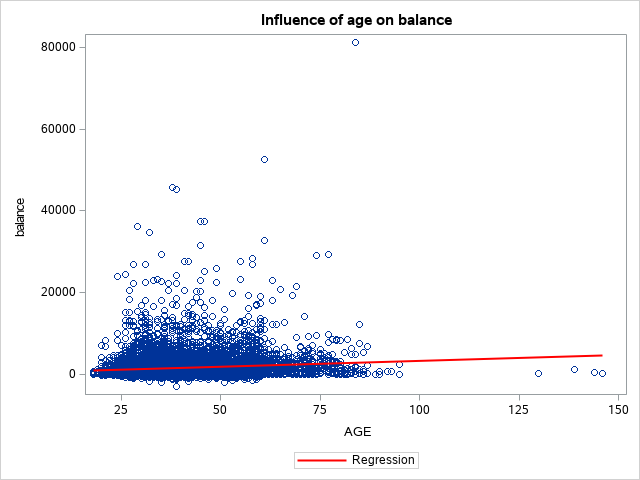

In [20]:
* use sgplot to draw a scatter plot and regression line ; 
title 'Influence of age on balance';
proc sgplot data=mylib.customer_all;
reg x=age y=balance / lineattrs=(color=red thickness=2);
run;

#### 3.1.  Binning  
- discretize the variable age by creating a new cat variable named age_cat: 
        18 <=AGE <=35 for young_adult,  
        36 <=AGE <=55 for middle_age  
        >56 for old.  
- show a simple frequency table for age_cat


####  Here is the code to create a bar chart of balance by age.  



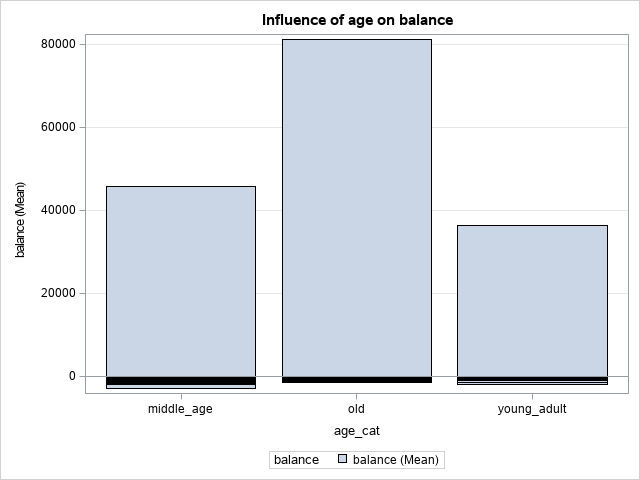

In [19]:
proc sgplot data=mylib.CUSTOMER_ALL;
    vbar age_cat / response=balance group=balance groupdisplay=cluster stat=mean;
    yaxis grid;
run;


#### 3.2. Which customers have the highest balance, young customers or older customers?


    Answer:

### 4. Examine the variable campaign 
campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

#### 4.1. Use proc univariate on campaign. 



#### 4.2. Based on quantiles table, the variable campaign seems  more categorical in nature than continuous. 
Convert the variable campaign into a categorical variable name "campaign_cat" with ordinal values { 1, 2, 3, >3} 


### 4. Examine the variable "balance"
#### 4.1. Investigate the distribution of balance.  use proc univariate to get the statistics along a histogram for the variable balance.



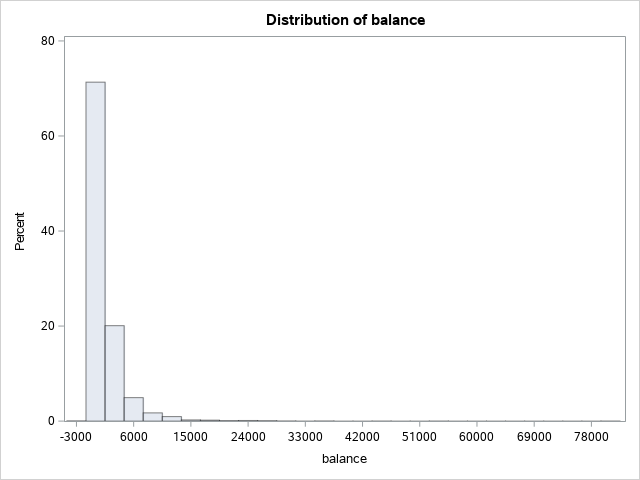

In [33]:
title "Running PROC UNIVARIATE on balance";
proc univariate data=mylib.customer_all noprint;
   id customer_id;
   var balance;
   histogram /;
run;

#### 4.2. Have a look at those two graphs. both show the balance by customers who did or did not purchase a CD. Which graph is more informative? What conclusion can you formulate based on the graph? 

    Answer: 



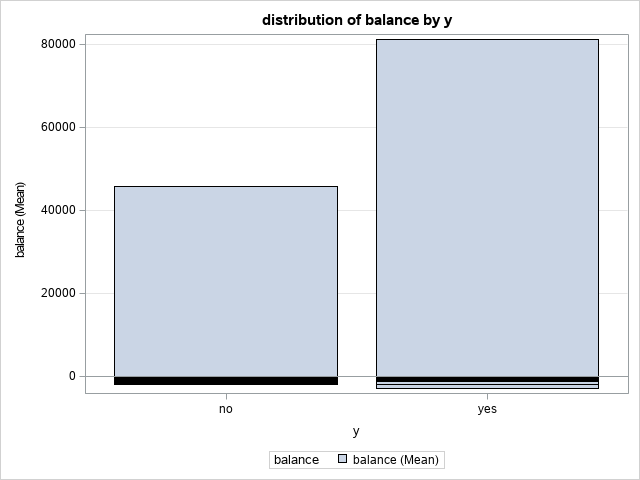
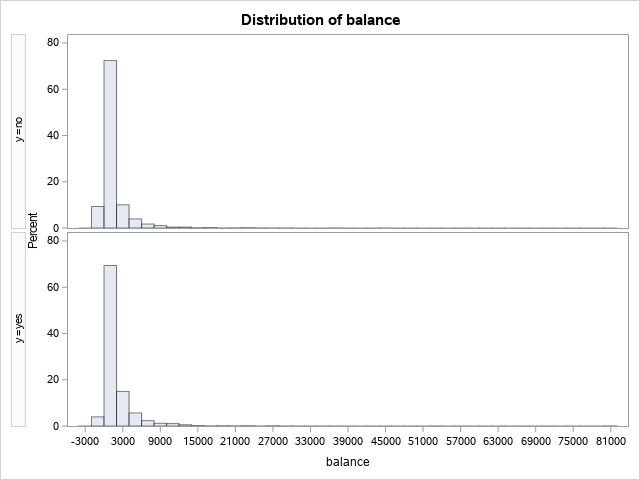

In [35]:

libname mylib '/folders/myfolders/Assignments';

proc sgplot data=mylib.CUSTOMER_ALL;
    vbar y / response=balance group=balance groupdisplay=cluster stat=mean;
    yaxis grid;
run;



title 'distribution of balance by y';
proc univariate data=mylib.customer_all noprint; 
class y; 
histogram balance; 
run;


### 5. Examine  the variable pdays 
pdays: number of days that passed by after the client was last contacted from a previous campaign 
 (numeric; -1 means client was not previously contacted)
 
#### 5.1. Use proc univariate on the variable pdays. 


#### 5.2. creating a derived variable
By checking the quantiles table in the proc univariate output, clearly it is better to create a new categorical variable named "contacted_before" that takes the value  'yes' if the customer has been contacted before and 'no' if the customer was not contacted before in a previous campaign (pdays=-1) 


#### 5.3. print the first 5 observations where pdays>0

#### 5.4. drop the column pdays 

#### 5.5. use proc means and make sure pdays is not there 

### 6.  Listing the 10 Highest and Lowest Values of balance 
Refer to Chapter 4- data cleaning techniques for numeric data.